In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
! pip install seaborn

In [20]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [21]:
test.shape

(25976, 25)

In [22]:
X_train = train.iloc[:, 8:-3]
X_test = test.iloc[:, 8:-3]
print(X_train.shape)
print(X_test.shape)
X_train.head()

(103904, 14)
(25976, 14)


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [23]:
train_target = train.iloc[:, -1:]
print(train_target.shape)
np.unique(train_target.values, return_counts = True)

(103904, 1)


(array(['neutral or dissatisfied', 'satisfied'], dtype=object),
 array([58879, 45025], dtype=int64))

In [24]:
# Zero centering the data
X = X_train.values
X_mean = np.mean(X, axis = 0)
X_n = X - np.matrix(X_mean)
X_n = X_n.T 
print(X_n.shape)

(14, 103904)


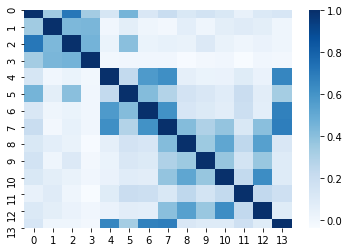

In [25]:
c1 = np.cov(X_n)
c2 = np.corrcoef(X_n)
ax = sns.heatmap(c2, cmap = "Blues")

In [26]:
eig_val, eig_vec = np.linalg.eig(c1)
eig_sorted = np.sort(eig_val)[::-1]
arg_sort = np.argsort(eig_val)[::-1]

In [27]:
print(eig_val)

[6.52815927 4.47255915 3.43215579 1.98504987 1.61162741 1.18057993
 1.02652179 0.87877104 0.32742411 0.75170941 0.57857082 0.47242866
 0.51571787 0.51339277]


In [28]:
eig_vec_ls = []
eig_val_ls = []

In [29]:
imp_vec = arg_sort[:3]
for i in imp_vec:
    eig_vec_ls.append(eig_vec[:, i])
    eig_val_ls.append(eig_val[i])
print(eig_vec_ls)
print(eig_val_ls)

[array([0.27033179, 0.15491373, 0.21598175, 0.09124768, 0.32248111,
       0.31012556, 0.35572388, 0.42488029, 0.24281505, 0.20346816,
       0.20154101, 0.16263595, 0.20267719, 0.36360393]), array([ 0.39021937,  0.49052653,  0.51498574,  0.37850549, -0.20260897,
        0.09688795, -0.1994409 , -0.22052189, -0.06650134, -0.02366476,
       -0.04491473, -0.04552343, -0.04930291, -0.2197468 ]), array([ 0.05306717, -0.00824977,  0.07508455,  0.06404967,  0.31940211,
        0.14576517,  0.27020783,  0.0037756 , -0.4376789 , -0.36397705,
       -0.42392401, -0.16410797, -0.43174682,  0.27201769])]
[6.52815927359577, 4.472559148142908, 3.4321557866762897]


In [30]:
# Estimate V
eig_val_arr = np.array(eig_val_ls)
lambda_1 = np.diag(eig_val_arr)
print(lambda_1)
eig_vec_mat = np.matrix(eig_vec_ls).T
v = eig_vec_mat@np.sqrt(lambda_1)
print(v)

[[6.52815927 0.         0.        ]
 [0.         4.47255915 0.        ]
 [0.         0.         3.43215579]]
[[ 0.69070483  0.82525254  0.09831266]
 [ 0.39580866  1.03738639 -0.01528359]
 [ 0.55183905  1.08911378  0.13910223]
 [ 0.23314023  0.80047953  0.11865892]
 [ 0.8239477  -0.42848608  0.59172685]
 [ 0.79237896  0.20490276  0.27004569]
 [ 0.90888385 -0.42178611  0.50058914]
 [ 1.08558032 -0.46636909  0.00699471]
 [ 0.62039882 -0.14063987 -0.81084737]
 [ 0.5198665  -0.05004723 -0.67430674]
 [ 0.51494257 -0.09498759 -0.78536494]
 [ 0.41553912 -0.09627489 -0.30402772]
 [ 0.51784555 -0.1042679  -0.79985753]
 [ 0.9290176  -0.46472989  0.50394211]]


In [31]:
# compute std
var_ls = []
X_var = np.var(X_n, axis = 1)
X_var = np.ravel(X_var)
print(X_var.shape)
print(X_var)
for i in range(v.shape[0]):
    s = np.sum(np.square(np.ravel(v[i, :])))
    sig_2 = X_var[i] - s
    var_ls.append(sig_2)
var_ls = np.array(var_ls)
s = np.diag(var_ls)
print(s)

(14,)
[1.76311414 2.32583197 1.95698483 1.63229974 1.76764022 1.82115689
 1.73997514 1.77684714 1.65984098 1.73079886 1.39451944 1.60121119
 1.38217027 1.72204345]
[[0.59533385 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.09276337 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.44694024 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.92309795 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.55500941 0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.07838266
  0.         0.         0.         0.      

In [32]:
# Dimensionality reduction transformation
c1_inv = np.linalg.inv(c1)
w = v.T@c1_inv
print(w.shape)
print(w)

(3, 14)
[[ 0.10580392  0.06063097  0.08453211  0.03571301  0.1262144   0.12137862
   0.13922513  0.16629195  0.09503427  0.07963447  0.07888021  0.06365334
   0.0793249   0.14230927]
 [ 0.18451462  0.2319447   0.2435102   0.17897573 -0.09580334  0.04581331
  -0.09430532 -0.10427343 -0.03144506 -0.01118984 -0.02123786 -0.02152568
  -0.0233128  -0.10390693]
 [ 0.02864458 -0.00445306  0.04052911  0.03457271  0.17240676  0.07868107
   0.14585269  0.00203799 -0.23625016 -0.1964674  -0.22882555 -0.08858214
  -0.23304814  0.14682961]]


In [33]:
z = w@X_n
z1 = z.T
print(z1)

[[ 1.17813457 -0.77690998  0.17824378]
 [-1.64286334  0.89139133 -0.56877708]
 [ 1.06568195 -1.37490904  0.5429592 ]
 ...
 [-0.10159264 -1.73737597 -0.01210009]
 [-1.87354186 -0.06824035 -1.3963161 ]
 [-2.16462     0.64493744 -0.26353567]]
